In [ ]:
from google.colab import files
uploaded=files.upload()

Saving impurity.xlsx to impurity.xlsx


In [ ]:
#documentation
#datset=buys_computer
#c.divya(monday)
#bl.en.u4cse21047

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_excel('impurity.xlsx')
df


age  income student credit_rating buys_computer
0    <=30    high      no          fair            no
1    <=30    high      no     excellent            no
2   31…40    high      no          fair           yes
3     >40  medium      no          fair           yes
4     >40     low     yes          fair           yes
5     >40     low     yes     excellent            no
6   31…40     low     yes     excellent           yes
7    <=30  medium      no          fair            no
8    <=30     low     yes          fair           yes
9     >40  medium     yes          fair           yes
10   <=30  medium     yes     excellent           yes
11  31…40  medium      no     excellent           yes
12  31…40    high     yes          fair           yes
13    >40  medium      no     excellent            no

In [ ]:
import pandas as pd
import numpy as np

def calculate_entropy(y):
    unique_labels = y.unique()
    entropy = 0
    total_samples = len(y)

    for label in unique_labels:
        label_count = len(y[y == label])
        p_label = label_count / total_samples
        entropy -= p_label * np.log2(p_label)

    return entropy
features = df.columns.difference(['buys_computer'])
entropy_dict = {}
for feature in features:
    entropy = 0
    unique_values = df[feature].unique()

    for value in unique_values:
        subset = df[df[feature] == value]
        entropy += len(subset) / len(df) * calculate_entropy(subset['buys_computer'])
    entropy_dict[feature] = entropy
for feature, entropy in entropy_dict.items():
    print(f"Entropy of {feature}: {entropy}")


Entropy of age: 0.6935361388961918
Entropy of credit_rating: 0.8921589282623617
Entropy of income: 0.9110633930116763
Entropy of student: 0.7884504573082896


In [ ]:
import math

# Calculate entropy
def entropy(probabilities):
    entropy = 0
    for p in probabilities:
        if p != 0:
            entropy -= p * math.log2(p)
    return entropy

# Calculate Information Gain
def information_gain(df, feature, target):
    # Calculate the entropy of the target variable
    target_entropy = entropy([df[target].value_counts()[value] / len(df) for value in df[target].unique()])

    # Calculate the weighted average entropy for the given feature
    weighted_entropy = 0
    for value in df[feature].unique():
        subset = df[df[feature] == value]
        subset_weight = len(subset) / len(df)
        subset_entropy = entropy([subset[target].value_counts()[v] / len(subset) for v in subset[target].unique()])
        weighted_entropy += subset_weight * subset_entropy

    # Calculate Information Gain
    information_gain = target_entropy - weighted_entropy
    return information_gain
df = pd.DataFrame(df)

# Calculate Information Gain for each feature
features = ['age', 'income', 'student', 'credit_rating']
target = 'buys_computer'
information_gains = {feature: information_gain(df, feature, target) for feature in features}

# Find the feature with the highest Information Gain (the root node)
root_node = max(information_gains, key=information_gains.get)

print("Information Gains:")
for feature, gain in information_gains.items():
    print(f"{feature}: {gain}")

print(f"The root node for the decision tree is: {root_node}")


Information Gains:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.04812703040826949
The root node for the decision tree is: age


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
model = DecisionTreeClassifier()
X =df.iloc[:,0:3]
y =df.iloc[:,[4]]
X_train, X_test, y_train, y_test = train_test_split(X, y )
model.fit(X_train,y_train)

training_accuracy = model.score(X_train,y_train)
print("Training Set Accuracy:", training_accuracy)
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)

ValueError: ignored

In [ ]:
#for the above error fwe should do label encoding
from sklearn.preprocessing import LabelEncoder
k = LabelEncoder()
df['age'] = k.fit_transform(df['age'])
df['income'] = k.fit_transform(df['income'])
df['student'] = k.fit_transform(df['student'])
df['credit_rating'] = k.fit_transform(df['credit_rating'])
df['buys_computer'] = k.fit_transform(df['buys_computer'])
df





age  income  student  credit_rating  buys_computer
0     1       0        0              1              0
1     1       0        0              0              0
2     0       0        0              1              1
3     2       2        0              1              1
4     2       1        1              1              1
5     2       1        1              0              0
6     0       1        1              0              1
7     1       2        0              1              0
8     1       1        1              1              1
9     2       2        1              1              1
10    1       2        1              0              1
11    0       2        0              0              1
12    0       0        1              1              1
13    2       2        0              0              0

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
model = DecisionTreeClassifier()
a =df.iloc[:,0:3]
b =df.iloc[:,[4]]
X_train, X_test, y_train, y_test = train_test_split(a, b )
model.fit(X_train,y_train)

training_accuracy = model.score(X_train,y_train)
print("Training Set Accuracy:", training_accuracy)
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)

Training Set Accuracy: 0.9
Tree Depth: 3


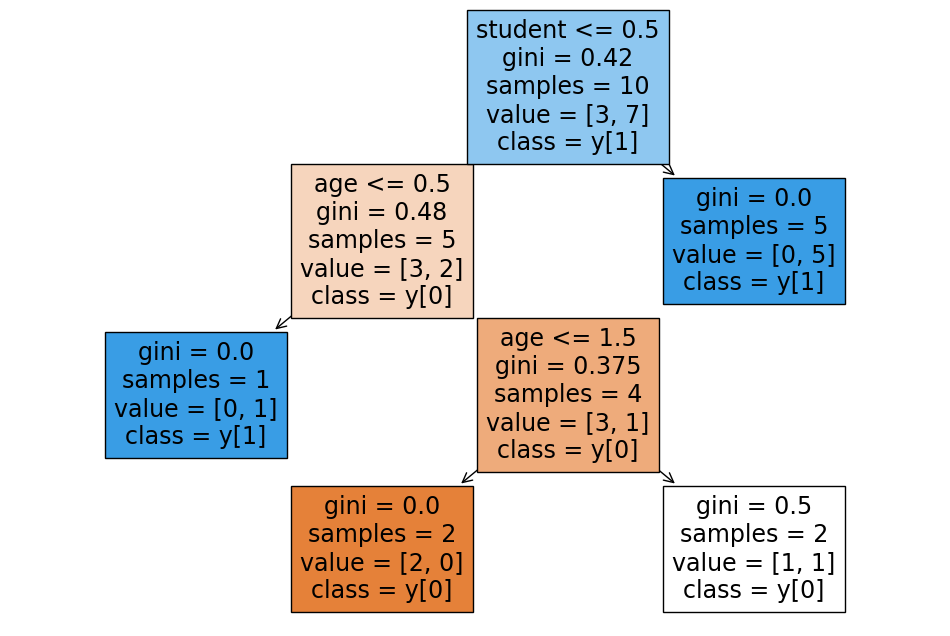

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving embeddingsdata.xlsx to embeddingsdata.xlsx


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_excel('embeddingsdata.xlsx')
df

embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0    0.009625 -0.029216  0.027109  0.023631 -0.004972  0.031757 -0.045125   
1   -0.007535 -0.039844  0.030167  0.031224  0.004742  0.028289 -0.068723   
2    0.022408 -0.030840  0.032328  0.046965  0.007798  0.025860 -0.065093   
3    0.019677 -0.034055  0.012662  0.070387 -0.011170  0.017842 -0.050945   
4    0.017678 -0.030323  0.012829  0.065267 -0.025161  0.011964 -0.050590   
..        ...       ...       ...       ...       ...       ...       ...   
895  0.019743 -0.071799  0.022546  0.049042 -0.005767 -0.016275 -0.037731   
896  0.000186 -0.027604  0.010623  0.038237 -0.026675  0.020215 -0.040816   
897  0.018066 -0.032152  0.039794  0.047608  0.003898  0.024092 -0.056508   
898 -0.003492 -0.022739  0.021777  0.044054 -0.005621  0.013863 -0.079196   
899  0.013689 -0.037855  0.039763  0.035750  0.004115  0.005637 -0.050556   

      embed_7   embed_8   embed_9  ...  embed_759  embed_760  embed_761  \
0    0.044483  0.019400 -0.017189  ...  -0.001972  -0.008154  -0.056139   
1    0.039153  0.019596 -0.027138  ...   0.008613  -0.006578  -0.034220   
2    0.035118  0.035359 -0.029205  ...   0.020413  -0.034288  -0.050649   
3    0.044878  0.034781 -0.025772  ...   0.002963  -0.018754  -0.053278   
4    0.042820  0.029161 -0.015004  ...   0.010192  -0.010147  -0.035857   
..        ...       ...       ...  ...        ...        ...        ...   
895  0.029718  0.009203 -0.030913  ...  -0.001192  -0.026138  -0.056447   
896  0.032210  0.041016 -0.014836  ...   0.015479  -0.003967  -0.037808   
897  0.020527  0.031972 -0.026038  ...   0.011308  -0.016882  -0.059904   
898  0.039150  0.004557 -0.015787  ...   0.004005  -0.007196  -0.041652   
899  0.024668  0.025077 -0.029114  ...  -0.000129  -0.003880  -0.048696   

     embed_762  embed_763  embed_764  embed_765  embed_766  embed_767  Label  
0     0.009890   0.042366   0.040134   0.009304  -0.016137  -0.009309      0  
1     0.027574   0.045456   0.027402   0.017837  -0.035009  -0.010062      0  
2     0.028408   0.040412   0.030261   0.003535  -0.034122  -0.017289      0  
3     0.033005   0.031635   0.022544  -0.011774  -0.011125  -0.017540      0  
4     0.021784   0.034621   0.017342  -0.009884  -0.010316  -0.029238      0  
..         ...        ...        ...        ...        ...        ...    ...  
895   0.015818   0.045241   0.012620  -0.004837  -0.014540  -0.046791      2  
896   0.021234   0.031012  -0.010890   0.003081  -0.015145  -0.045444      0  
897   0.009558   0.039976   0.029574   0.013737  -0.003724  -0.017324      2  
898   0.020945   0.047604   0.019767   0.005806  -0.019280  -0.016415      5  
899   0.015711   0.039773   0.036328   0.010483  -0.021304  -0.032017      2  

[900 rows x 769 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X =df.iloc[:,0:768]
y =df.iloc[:,768]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a DecisionTreeClassifier model
model = DecisionTreeClassifier()

model.fit(X_train,y_train)

train_accuracy =model.score(X_train,y_train)
print(f"Training Set Accuracy: {train_accuracy:.2f}")

# Test Set Accuracy
test_accuracy = model.score(X_test,y_test)
print(f"Test Set Accuracy: {test_accuracy:.2f}")



Training Set Accuracy: 1.00
Test Set Accuracy: 0.42


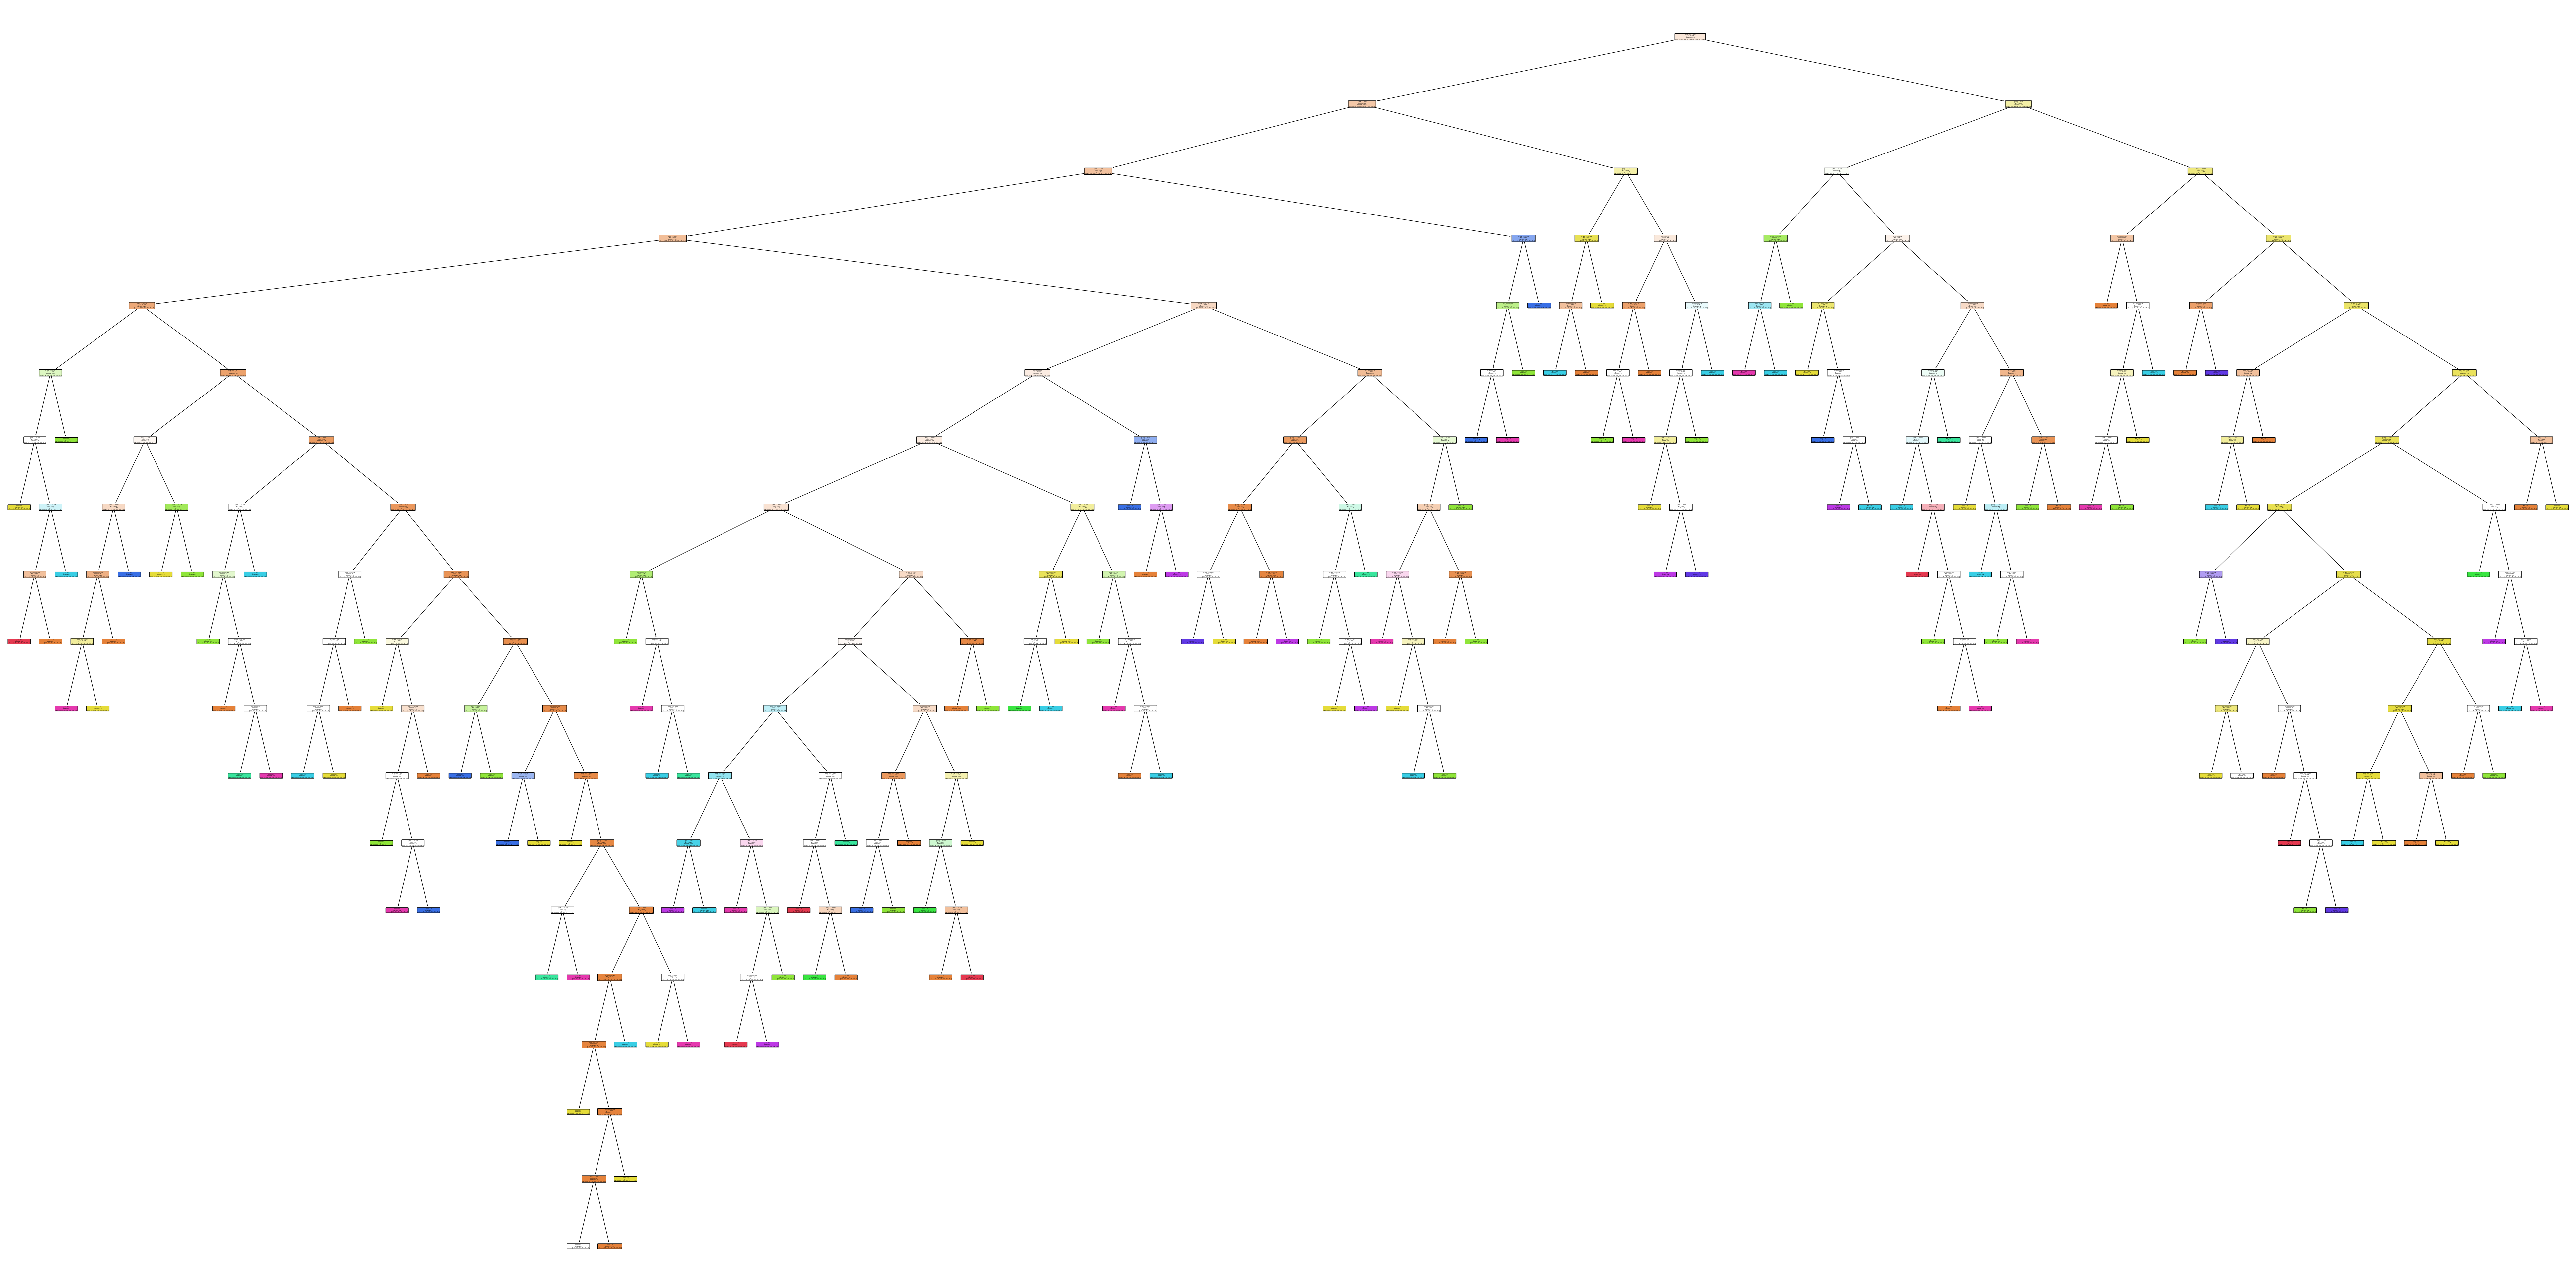

In [ ]:
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(100,50))
plot_tree(model, filled=True,rounded=True)
plt.show()

In [ ]:
mode_l = DecisionTreeClassifier(max_depth=5)
mode_l.fit(X_train, y_train)
y_train_pred = mode_l.predict(X_train)
y_test_pred = mode_l.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")
# Plot the Decision Tree with max_depth constraint
plt.figure(figsize=(100, 90))
plot_tree(mode_l, filled=True,rounded=True)
plt.show()


Training Set Accuracy: 0.68
Test Set Accuracy: 0.49


Training Set Accuracy: 1.00
Test Set Accuracy: 0.43


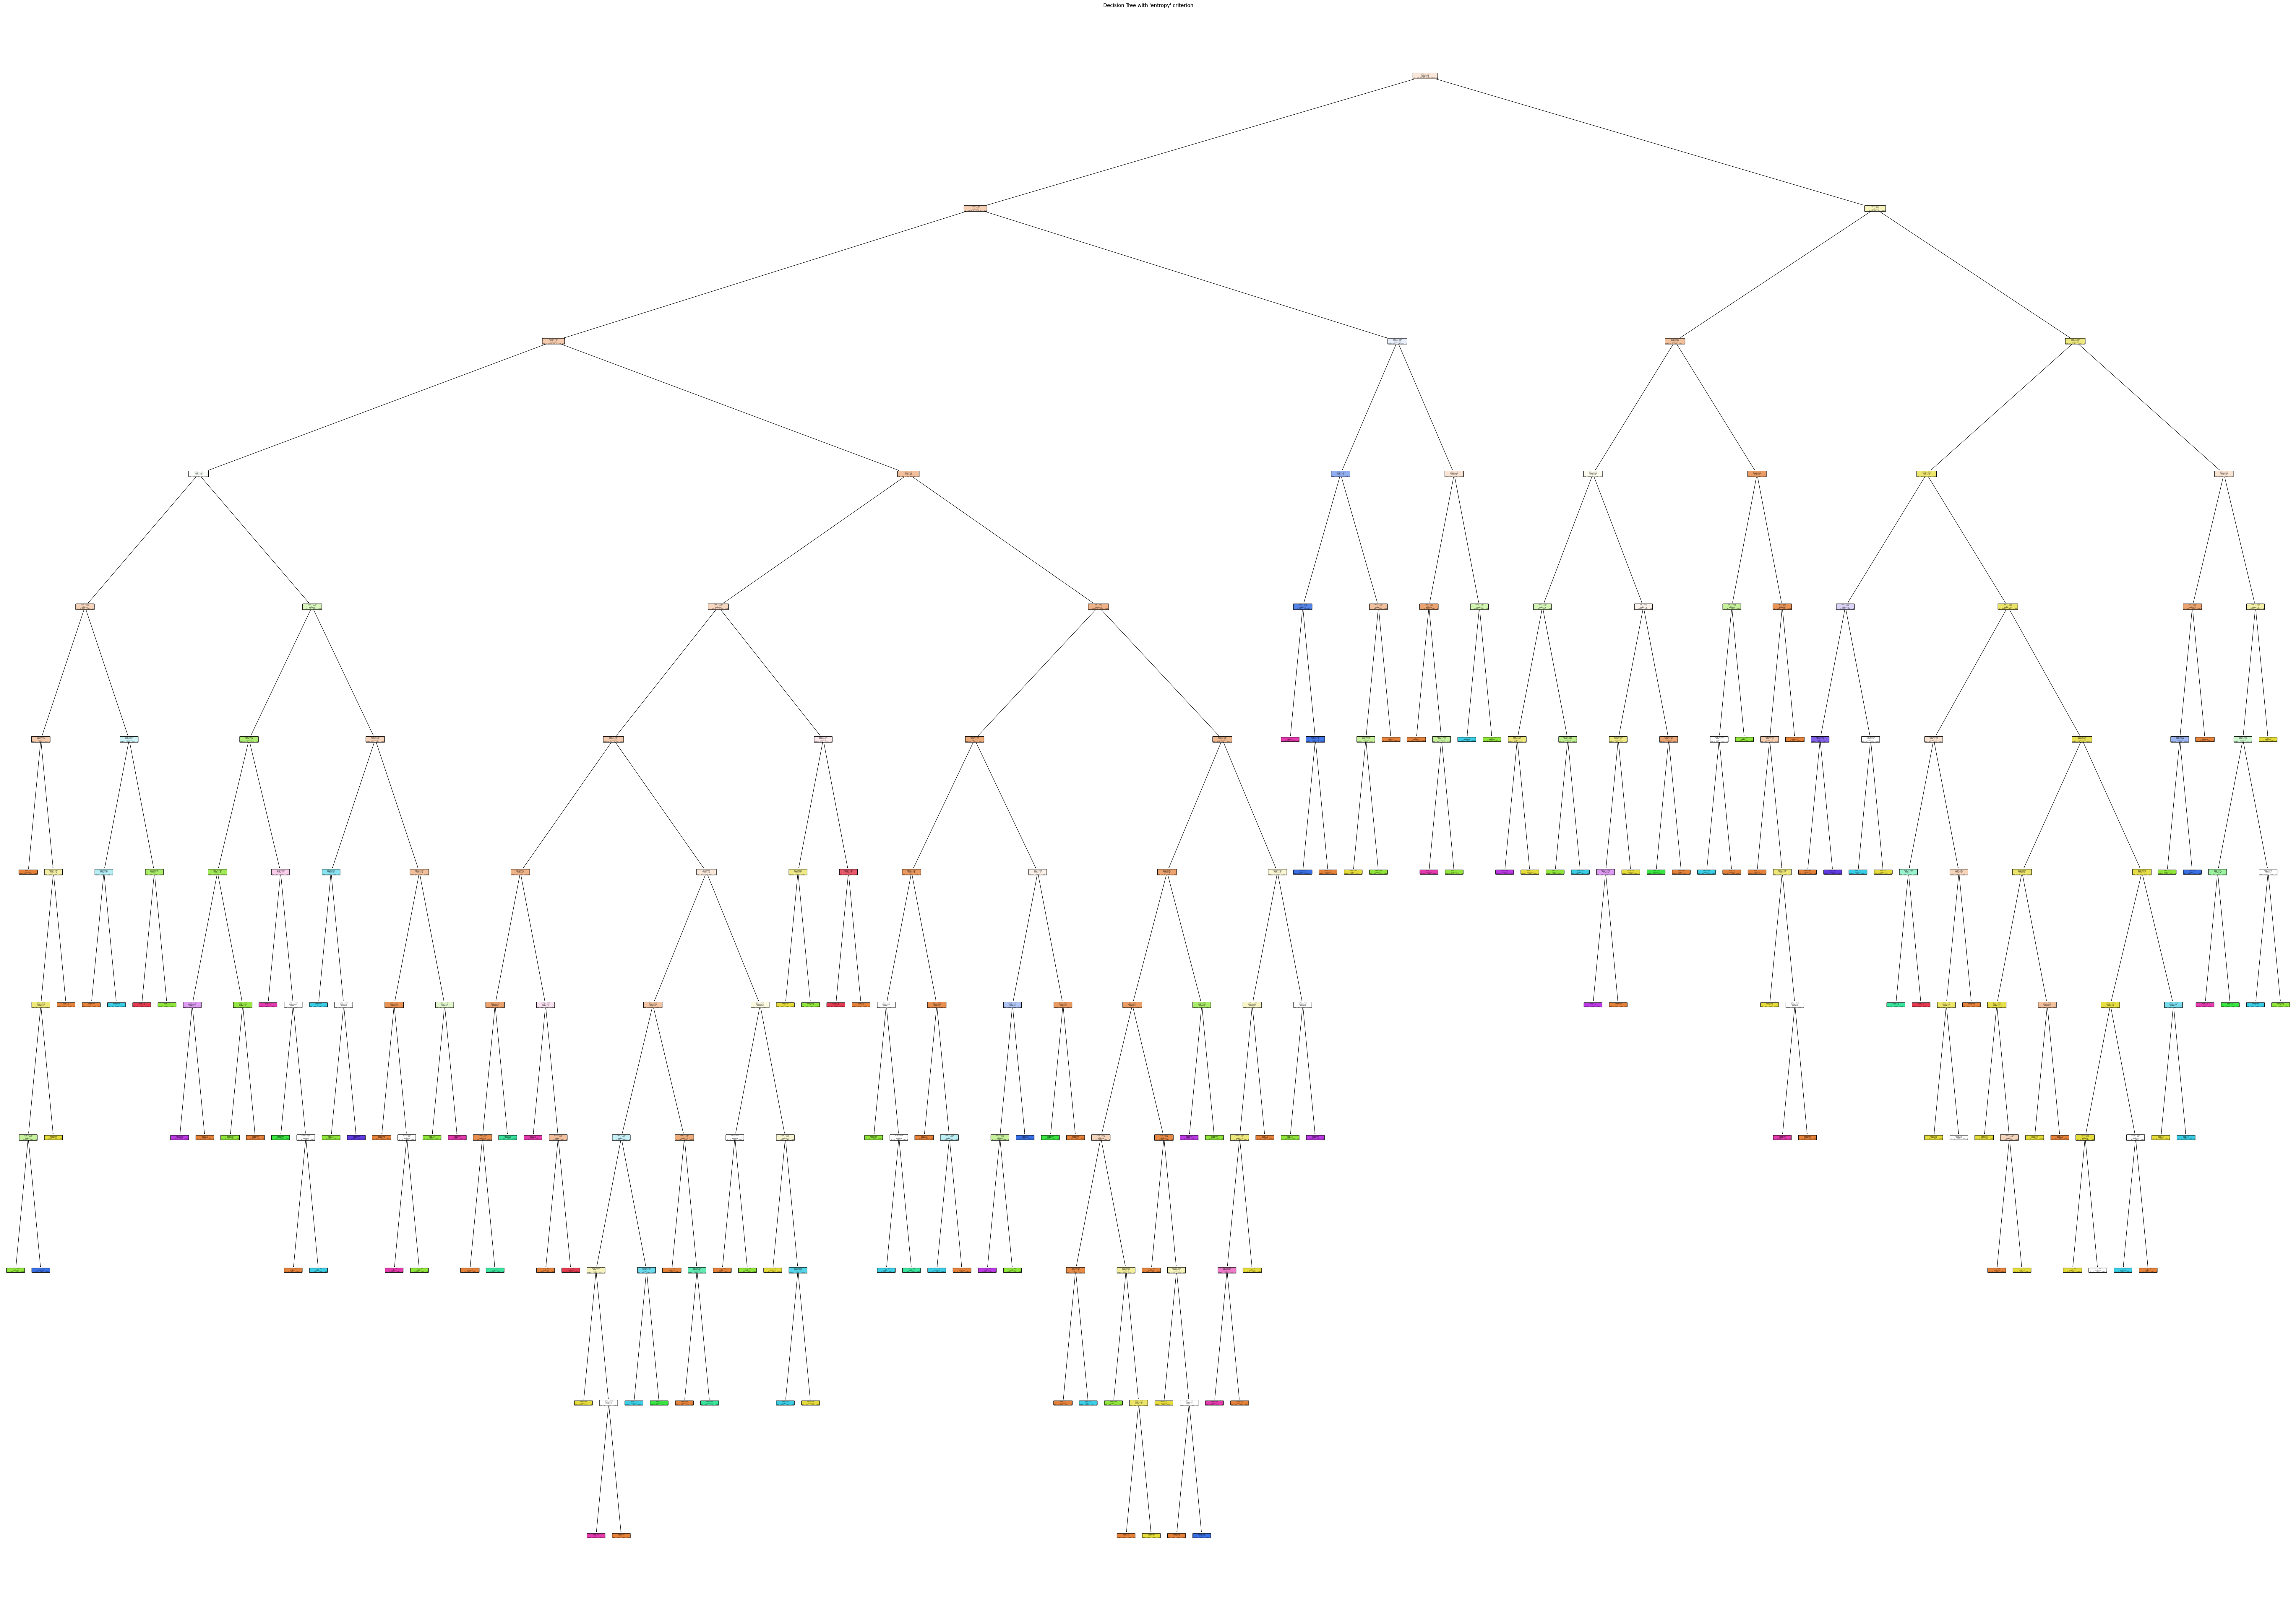

In [ ]:
model_entropy = DecisionTreeClassifier(criterion="entropy")
# Fit the model to the training data
model_entropy.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred_entropy = model_entropy.predict(X_train)
y_test_pred_entropy = model_entropy.predict(X_test)

# Calculate accuracies for the "entropy" criterion
train_accuracy_entropy = accuracy_score(y_train, y_train_pred_entropy)
test_accuracy_entropy = accuracy_score(y_test, y_test_pred_entropy)

#print("Using 'entropy' criterion:")
print(f"Training Set Accuracy: {train_accuracy_entropy:.2f}")
print(f"Test Set Accuracy: {test_accuracy_entropy:.2f}")

# Plot the Decision Tree with "entropy" criterion
plt.figure(figsize=(100,70))
plot_tree(model_entropy, filled=True,rounded=True)
plt.title("Decision Tree with 'entropy' criterion")
plt.show()
